# **Taller 2**

## **An√°lisis Inferencial Bivariado con Datos PISA 2009** üè´

En este taller, nos enfocaremos en realizar an√°lisis inferenciales bivariados utilizando datos de PISA 2009 para Chile. A lo largo de esta sesi√≥n, aprender√°s a aplicar diversas pruebas estad√≠sticas, como la prueba de Chi-Cuadrado, *U* de Mann-Whitney, la *H* de Kruskal-Wallis, la prueba *t* para muestras independientes, ANOVA, y las correlaciones (*r*) de Spearman y Pearson. Adem√°s, explorar√°s c√≥mo interpretar y reportar los resultados de estas pruebas, apoy√°ndote en visualizaciones gr√°ficas que facilitar√°n la comprensi√≥n de las relaciones entre variables.

### **Instalaci√≥n de Paquetes**

Comenzamos instalando los paquetes necesarios para esta sesi√≥n. Estos paquetes nos permitir√°n importar datos en formato SPSS, generar gr√°ficos, calcular pruebas estad√≠sticas como Chi-Cuadrado, y obtener estad√≠sticas descriptivas detalladas.

In [2]:
!pip install pandas matplotlib seaborn scipy statsmodels Pyreadstat pingouin

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 17.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 198.9/198.9 kB 11.6 MB/s eta 0:00:00


### **Carga de Bibliotecas**

A continuaci√≥n, cargamos las bibliotecas de los paquetes que acabamos de instalar para hacer uso de sus funciones en el an√°lisis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import numpy as np

### Configuraci√≥n del Directorio de Trabajo
En Google Colab no es necesario cambiar el directorio de trabajo, solo cargar los archivos correctamente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importaci√≥n de Datos

En esta secci√≥n, importamos los datos del archivo SPSS (.sav) a R utilizando el paquete `pandas`, que convierte autom√°ticamente los datos en un data frame para facilitar su manipulaci√≥n y an√°lisis.

In [1]:
import pandas as pd
import pyreadstat

# Cargar el archivo SPSS
pisa2009_chl = pd.read_spss('/content/drive/My Drive/Teaching/Metodolog√≠a Cuantitativa II 2024/Sesi√≥n 2/pisa2009_chl.sav')
pisa2009_chl.head()

ModuleNotFoundError: No module named 'pyreadstat'

### Exploraci√≥n Inicial de los Datos

Antes de realizar an√°lisis estad√≠sticos, es fundamental entender la estructura y contenido del conjunto de datos. Exploremos entonces brevemente el data frame, observando su clase, los primeros registros, los nombres de las variables, y obteniendo un resumen descriptivo b√°sico.

In [ ]:
print(type(pisa2009_chl))  # Verifica la clase del objeto
print(pisa2009_chl.head())  # Muestra los primeros 6 casos de la base de datos
print(pisa2009_chl.columns)  # Lista los nombres de las variables
print(pisa2009_chl.shape)  # Muestra el n√∫mero de variables y casos
print(pisa2009_chl.describe())  # Proporciona un resumen estad√≠stico para cada variable
print(pisa2009_chl.info())  # Muestra la estructura interna del data frame

### Prueba de Chi-Cuadrado (œá2)

La prueba de Chi-Cuadrado (œá2) es √∫til para evaluar si existe una asociaci√≥n estad√≠sticamente significativa entre dos variables categ√≥ricas. As√≠, inferimos estad√≠sticamente si dicha asociaci√≥n existe en la poblaci√≥n objetivo bajo un nivel de confianza (habitualmente con un 95%). En esta secci√≥n, analizaremos la relaci√≥n entre el g√©nero de los estudiantes y el tipo de establecimiento en el que estudian.

#### An√°lisis Descriptivo para Variables Categ√≥ricas

Primero, generamos tablas de contingencia que muestran la distribuci√≥n de las variables categ√≥ricas de inter√©s. Estas tablas permiten observar la frecuencia y proporci√≥n de cada categor√≠a, tanto de manera individual como cruzada entre dos variables.

In [ ]:
# Tabla de contingencia para una variable categ√≥rica
print(pisa2009_chl['sex'].value_counts())  # Distribuci√≥n de g√©nero
print(pisa2009_chl['type'].value_counts())  # Distribuci√≥n por tipo de establecimiento

# Tabla de contingencia para dos variables categ√≥ricas
print(pd.crosstab(pisa2009_chl['type'], pisa2009_chl['sex']))  # Distribuci√≥n conjunta de g√©nero y tipo de establecimiento

# Tabla de porcentajes para variables categ√≥ricas por grupo de inter√©s
# "normalize='columns'" entrega las proporciones de la distribuci√≥n condicional de la variable 1 seg√∫n la variable 2
print(pd.crosstab(pisa2009_chl['type'], pisa2009_chl['sex'], normalize='columns'))

sex
Male      2870
Female    2799
Name: count, dtype: int64
type
Private government-dependent    2174
Public                          2141
Private independent              166
Name: count, dtype: int64
sex                           Female  Male
type                                      
Private government-dependent    1119  1055
Private independent               99    67
Public                          1028  1113
sex                             Female      Male
type                                            
Private government-dependent  0.498219  0.472036
Private independent           0.044078  0.029978
Public                        0.457703  0.497987


#### Visualizaci√≥n de Variables Categ√≥ricas

Para visualizar la distribuci√≥n de las variables categ√≥ricas, generamos gr√°ficos de barras y gr√°ficos circulares.

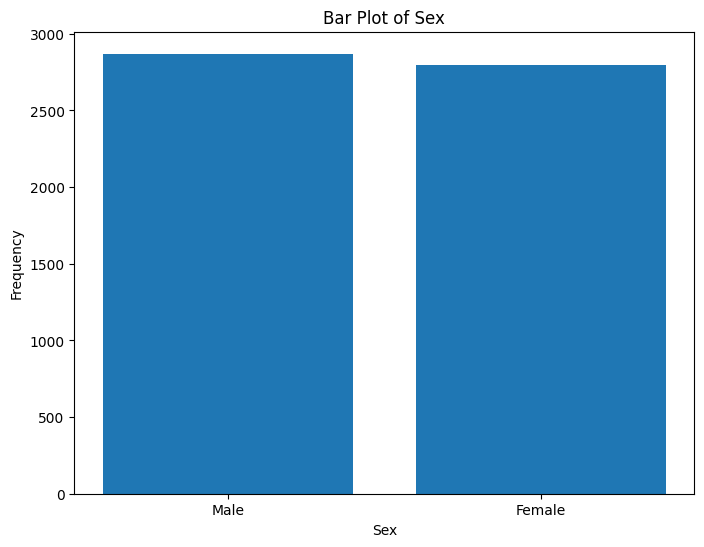

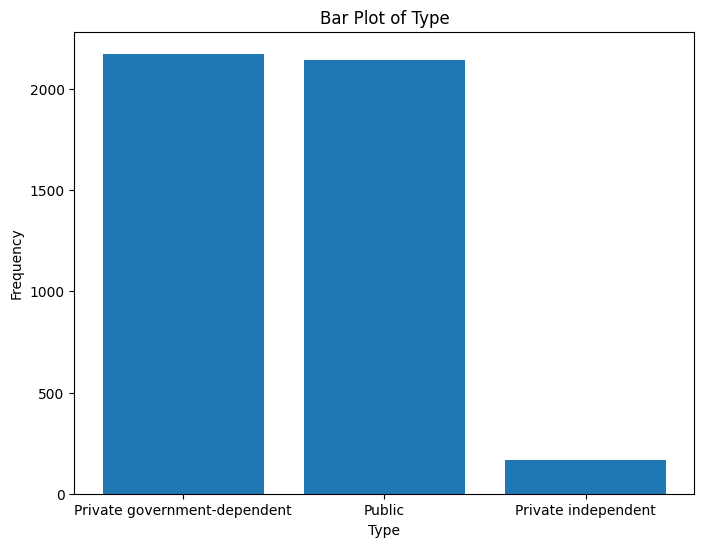

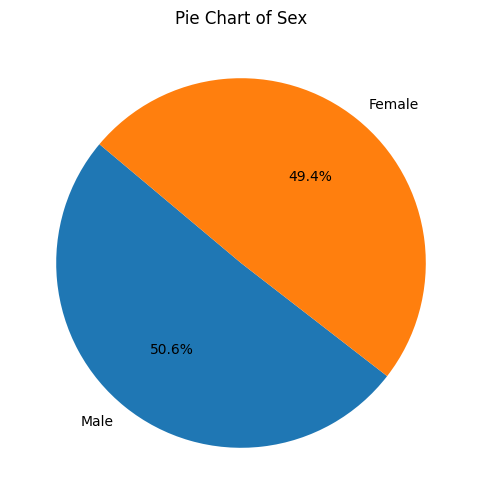

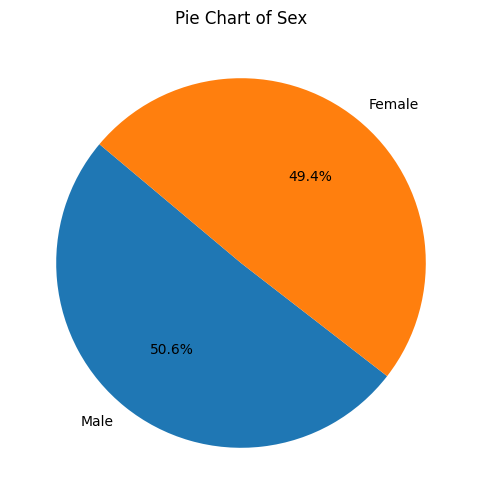

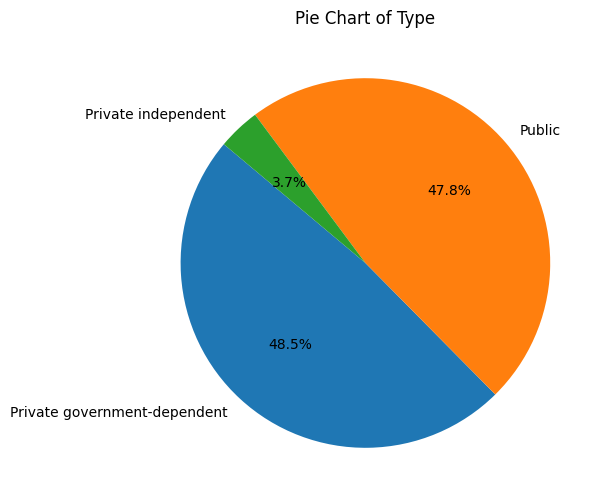

In [ ]:
# Crear una tabla de frecuencias para la variable 'sex'
plot = df['sex'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 6))
plt.bar(plot['Var1'], plot['Freq'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Plot of Sex')
plt.show()

# Crear una tabla de frecuencias para la variable 'type'
plot = df['type'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 6))
plt.bar(plot['Var1'], plot['Freq'])
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Type')
plt.show()

# Crear una tabla de frecuencias para la variable 'sex'
plot = df['sex'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gr√°fico circular
plt.figure(figsize=(8, 6))
plt.pie(plot['Freq'], labels=plot['Var1'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Sex')
plt.show()

# Crear una tabla de frecuencias para la variable 'sex'
plot = df['sex'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gr√°fico circular
plt.figure(figsize=(8, 6))
plt.pie(plot['Freq'], labels=plot['Var1'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Sex')
plt.show()

# Crear una tabla de frecuencias para la variable 'type'
plot = df['type'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gr√°fico circular
plt.figure(figsize=(8, 6))
plt.pie(plot['Freq'], labels=plot['Var1'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Type')
plt.show()


### Prueba de Chi-Cuadrado

Veamos si existe una asociaci√≥n entre el g√©nero de los estudiantes y el tipo de establecimiento en el que estudian. En este paso, visualizamos las proporciones condicionales de la variable `type` por cada categor√≠a de la variable `sex` para finalmente estimar un chi-cuadrado usando `stats.chi2_contingency`.

In [ ]:
# Generaci√≥n de la tabla de contingencia con la funci√≥n crosstab
contingency_table = pd.crosstab(pisa2009_chl['type'], pisa2009_chl['sex'])

# Realizar la prueba de Chi-Cuadrado
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(ex)

Chi2: 11.40041644665721, p-value: 0.0033452688219367216, Degrees of Freedom: 2
Expected Frequencies:
[[1089.66837759 1084.33162241]
 [  83.20374916   82.79625084]
 [1073.12787324 1067.87212676]]


#### Interpretaci√≥n de la Prueba de Chi-Cuadrado (œá2)

La prueba de œá2 nos permite verificar la hip√≥tesis nula de que no hay asociaci√≥n entre las variables `type` y `sex`. Ahora, es muy importante comprender c√≥mo se interpreta y reporta usando un estilo de escritura acad√©mica. Primero, debemos entender que si el valor *p* es lo suficientemente peque√±o (por convenci√≥n, *p* \< .05; *p* \< .01; *p* \< .001), se rechaza la hip√≥tesis nula. Bajo ese escenario, para nuestro ejemplo, esto indicar√≠a que el g√©nero de los estudiantes est√° asociado con el tipo de establecimiento en el que estudian. Segundo, para reportar en un informe es posible formularlo as√≠:

"Existe una asociaci√≥n estad√≠sticamente significativa entre el g√©nero de los estudiantes y la dependencia administrativa del establecimiento en el que estudian (*œá2*(2) = 11.40, *p* \< .01)."

Notar que en el par√©ntesis reportamos el valor del estad√≠stico *œá2*, seguido por los grados de libertad y el valor *p*.

### Prueba U de Mann-Whitney

La prueba U de Mann-Whitney es una prueba no param√©trica que se utiliza para comparar las diferencias entre dos grupos independientes cuando la variable de inter√©s no sigue una distribuci√≥n normal. En este caso, se usar√° para comparar el estatus socioecon√≥mico (estatus socioecon√≥mico) entre ni√±os y ni√±as.

-   Primero, aseguramos que las variables de inter√©s est√°n en formato num√©rico, lo cual es necesario para realizar la prueba.

In [ ]:
pisa2009_chl['ses'] = pd.to_numeric(pisa2009_chl['ses'], errors='coerce')

count    5580.000000
mean       -0.505586
std         1.164141
min        -4.245100
25%        -1.348025
50%        -0.566100
75%         0.361500
max         2.881400
Name: ses, dtype: float64
1.1641414923365998
1.3552254141796856
         count      mean       std     min     25%      50%       75%     max
sex                                                                          
Female  2756.0 -0.503617  1.181322 -3.8669 -1.3640 -0.56100  0.383675  2.8814
Male    2824.0 -0.507508  1.147333 -4.2451 -1.3322 -0.57775  0.330450  2.5794
U-statistic: 3897362.0, p-value: 0.9220190325625239


<ipython-input-40-45e2bb85f07a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pisa2009_chl.groupby('sex')['ses'].describe())


-   **C√°lculo de Estad√≠sticos Descriptivos**: Obtenemos estad√≠sticas b√°sicas como la media, desviaci√≥n est√°ndar y varianza del estatus socioecon√≥mico (estatus socioecon√≥mico) para entender mejor la distribuci√≥n de la variable.

In [ ]:
print(pisa2009_chl['ses'].describe())  # Resumen descriptivo de estatus socioecon√≥mico
print(pisa2009_chl['ses'].std())  # Desviaci√≥n est√°ndar de estatus socioecon√≥mico
print(pisa2009_chl['ses'].var())  # Varianza de estatus socioecon√≥mico

-   Adem√°s, calculamos estad√≠sticas descriptivas del estatus socioecon√≥mico por grupo de g√©nero.

In [ ]:
print(pisa2009_chl.groupby('sex')['ses'].describe())

-   **Visualizaci√≥n de la Distribuci√≥n**: para comprender mejor la distribuci√≥n de los datos, generamos varios tipos de gr√°ficos, incluyendo histogramas, gr√°ficos de densidad y gr√°ficos cuartil-cuartil (Q-Q plot).

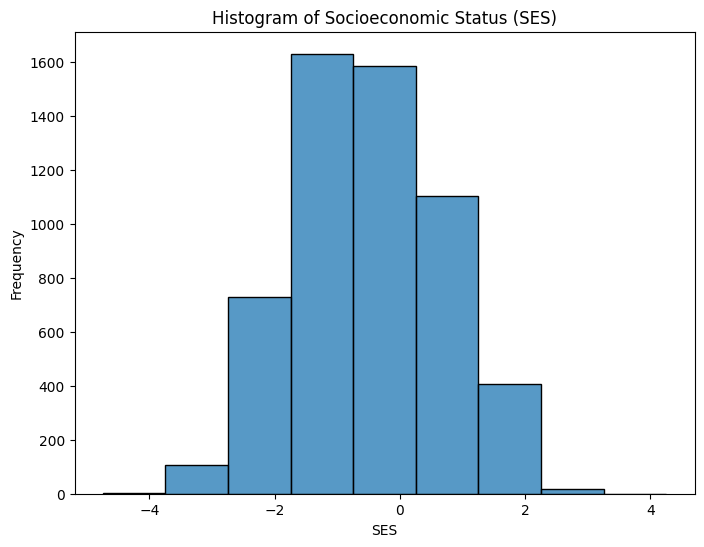

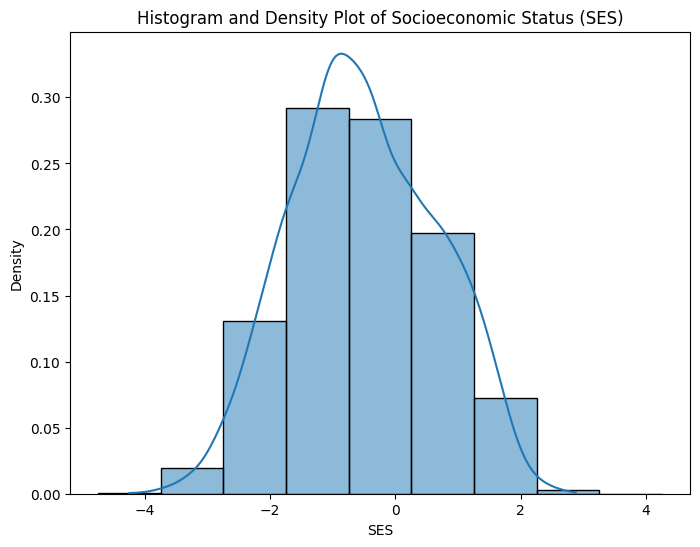

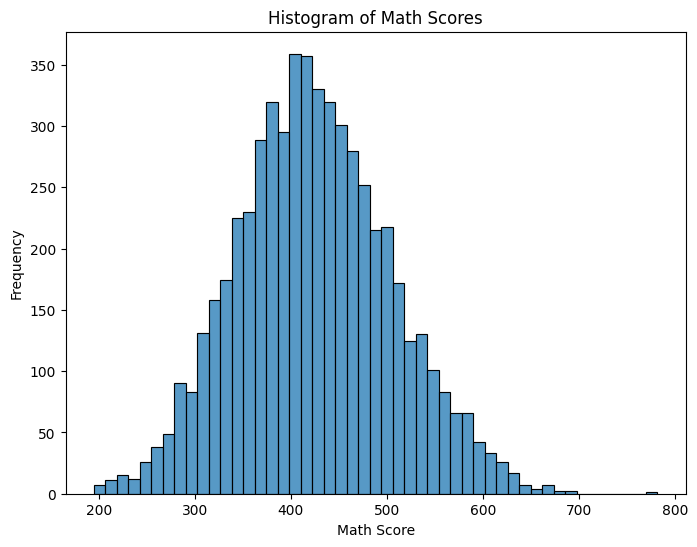

In [ ]:
# Histograma de la variable 'ses'
plt.figure(figsize=(8, 6))
sns.histplot(df['ses'], kde=False)
plt.xlabel('SES')
plt.ylabel('Frequency')
plt.title('Histogram of Socioeconomic Status (SES)')
plt.show()

# Histograma y gr√°fico de densidad combinados para la variable 'ses'
plt.figure(figsize=(8, 6))
sns.histplot(df['ses'], kde=True, stat="density")
plt.xlabel('SES')
plt.ylabel('Density')
plt.title('Histogram and Density Plot of Socioeconomic Status (SES)')
plt.show()

# Histograma de la variable 'math'
plt.figure(figsize=(8, 6))
sns.histplot(df['math'], kde=False)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math Scores')
plt.show()

-   El gr√°fico cuartil-cuartil (Q-Q plot) nos ayuda a visualizar si la distribuci√≥n del estatus socioecon√≥mico sigue una distribuci√≥n normal. Si los puntos en el gr√°fico se distribuyen aproximadamente a lo largo de una l√≠nea diagonal, entonces se puede concluir que la variable se distribuye normalmente.

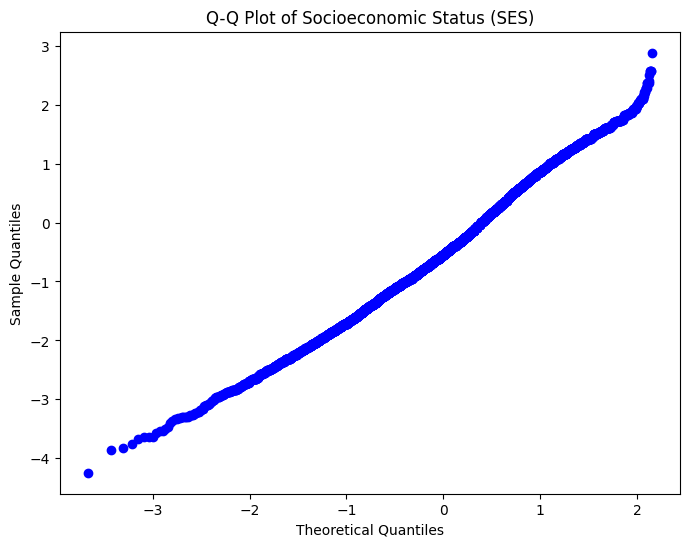

In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(df['ses'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Socioeconomic Status (SES)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [ ]:
### Prueba de Normalidad Shapiro-Wilk

La prueba de Shapiro-Wilk eval√∫a formalmente si una muestra sigue una distribuci√≥n normal. Esto es importante para determinar si es apropiado usar pruebas param√©tricas o si es necesario utilizar alternativas no param√©tricas como la Prueba U de Mann-Whitney. Si el valor *p* de esta prueba es menor que 0.05, se rechaza la hip√≥tesis nula de normalidad, sugiriendo que los datos no siguen una distribuci√≥n normal.

In [ ]:
# Prueba de normalidad Shapiro-Wilk para los primeros 5000 casos de estatus socioecon√≥mico
shapiro_test = stats.shapiro(pisa2009_chl['ses'].dropna()[:5000])
print(f'Shapiro-Wilk Test: {shapiro_test}')

Shapiro-Wilk Test: ShapiroResult(statistic=0.9919558639792816, pvalue=3.0824831581886867e-16)


#### Estimaci√≥n de la Prueba U de Mann-Whitney

Finalmente, realizamos la Prueba U de Mann-Whitney para comparar el estatus socioecon√≥mico entre ni√±os y ni√±as bajo la siguiente pregunta de investigaci√≥n: ¬øDifieren significativamente los ni√±os de las ni√±as en su estatus socioecon√≥mico? Y establecemos las siguientes hip√≥tesis estad√≠sticas:

-   **Hip√≥tesis nula (H0)**: No hay diferencia significativa en el estatus socioecon√≥mico entre ni√±os y ni√±as.
-   **Hip√≥tesis alternativa (H1)**: Hay una diferencia significativa en el estatus socioecon√≥mico entre ni√±os y ni√±as.

In [ ]:
u_statistic, p_value = stats.mannwhitneyu(
    pisa2009_chl[pisa2009_chl['sex'] == 'Female']['ses'].dropna(),
    pisa2009_chl[pisa2009_chl['sex'] == 'Male']['ses'].dropna()
)
print(f'U-statistic: {u_statistic}, p-value: {p_value}')

U-statistic: 3897362.0, p-value: 0.9220190325625239


-   **Interpretaci√≥n de los Resultados**: Interpretamos los resultados de la prueba U de Mann-Whitney, donde el valor de *p* indica si podemos rechazar la hip√≥tesis nula de que no hay diferencias significativas entre los grupos.
    -   Si el valor de p es lo suficientemente peque√±o (*p* \< .05), se rechaza la hip√≥tesis nula.
    -   Esto indicar√≠a que el estatus socio-econ√≥mico de los estudiantes difiere significativamente entre ni√±os y ni√±as.
    -   **Reporte de Resultados**: Los ni√±os (Mdn = 1230) presentan significativamente menor estatus socioecon√≥mico que las ni√±as (Me = 1245, W = 7311835, *p* \< .001).

### Prueba *H* de Kruskal-Wallis

La prueba *H* de Kruskal-Wallis es una prueba no param√©trica utilizada para comparar m√°s de dos grupos independientes. Es una alternativa a ANOVA cuando no se cumple el supuesto de normalidad. En esta secci√≥n, la prueba se usar√° para evaluar si el estatus socioecon√≥mico de los estudiantes difiere seg√∫n el tipo de establecimiento al que asisten.

-   Primero, calculamos estad√≠sticas descriptivas b√°sicas del SES por cada tipo de establecimiento (type) para tener una idea preliminar de las diferencias entre los grupos.
-   Esta l√≠nea de c√≥digo genera res√∫menes estad√≠sticos (como la media y la mediana) del SES para cada categor√≠a del tipo de establecimiento, lo que ayuda a identificar posibles diferencias preliminares entre los grupos.

In [ ]:
print(pisa2009_chl.groupby('type')['ses'].describe())

                               count      mean       std     min      25%  \
type                                                                        
Private government-dependent  2135.0 -0.526903  0.983206 -3.8251 -1.19235   
Private independent            165.0  0.607113  0.707774 -1.6254  0.17530   
Public                        2097.0 -0.969168  1.062748 -4.2451 -1.74290   

                                 50%     75%     max  
type                                                  
Private government-dependent -0.5442  0.1935  2.0778  
Private independent           0.7010  1.1056  1.8849  
Public                       -0.9930 -0.2808  2.5002  


<ipython-input-48-b6a97bf611a6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pisa2009_chl.groupby('type')['ses'].describe())


-   **Formulaci√≥n de la Pregunta de Investigaci√≥n**: la pregunta de investigaci√≥n que vamos a responder con la prueba H de Kruskal-Wallis es ¬ødifiere significativamente el estatus socioecon√≥mico de los estudiantes seg√∫n la dependencia del establecimiento al que asisten?
-   Formulamos las hip√≥tesis nula y alternativa:
    -   **H0**: El estatus socio-econ√≥mico de los estudiantes no difiere significativamente seg√∫n la dependencia del establecimiento al que asisten.
    -   **H1**: El estatus socio-econ√≥mico de los estudiantes s√≠ difiere significativamente seg√∫n la dependencia del establecimiento al que asisten.

#### Estimaci√≥n de la Prueba *H* de Kruskal-Wallis

Realizamos la prueba *H* de Kruskal-Wallis para determinar si hay diferencias significativas en el estatus socioecon√≥mico de los estudiantes seg√∫n el tipo de establecimiento. Esta l√≠nea de c√≥digo eval√∫a si las distribuciones del estatus socioeocn√≥mico son diferentes entre los grupos definidos por la variable `type` (tipo de establecimiento).

In [ ]:
kruskal_test = stats.kruskal(
    *[group['ses'].dropna() for name, group in pisa2009_chl.groupby('type')]
)
print(f'Kruskal-Wallis Test: {kruskal_test}')

Kruskal-Wallis Test: KruskalResult(statistic=422.5355809222295, pvalue=1.7683344136785536e-92)


<ipython-input-50-aad3463e4024>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  *[group['ses'].dropna() for name, group in pisa2009_chl.groupby('type')]


-   **Interpretaci√≥n de los Resultados**: interpretamos el estad√≠stico *H* y su valor de *p* resultante para determinar si podemos rechazar la hip√≥tesis nula. Si el valor de *p* es lo suficientemente peque√±o (*p* \< .05), se rechaza la hip√≥tesis nula. Esto indicar√≠a que existen diferencias significativas en el estatus socioecon√≥mico de los estudiantes seg√∫n la dependencia del establecimiento.
-   **Reporte de resultados**: El estatus socioecon√≥mico de los estudiantes difiere seg√∫n la dependencia del establecimiento al que asisten (*H*(2) = 422.54, *p* \< .001).

### Correlaci√≥n de Spearman (œÅ)

La correlaci√≥n de Spearman (œÅ) es una medida no param√©trica de la asociaci√≥n lineal entre dos variables ordinales o no normalmente distribuidas. En esta secci√≥n, utilizaremos la correlaci√≥n de Spearman para investigar si existe una asociaci√≥n significativa entre el estatus socioecon√≥mico de los estudiantes y su puntaje en matem√°ticas. La pregunta de investigaci√≥n que abordaremos es: ¬øExiste una asociaci√≥n significativa entre el estatus socio-econ√≥mico de los estudiantes y su puntaje en matem√°ticas? Y formulamos las hip√≥tesis nula y alternativa:

-   **H0**: El estatus socioecon√≥mico de los estudiantes no se asocia a los puntajes de matem√°ticas.
-   **H1**: El estatus socioecon√≥mico de los estudiantes s√≠ se asocia a los puntajes de matem√°ticas.

Antes de calcular la correlaci√≥n, es √∫til visualizar la relaci√≥n entre el estatus socioecon√≥mico y los puntajes en matem√°ticas para tener una idea preliminar de la posible asociaci√≥n. Estos gr√°ficos muestran la relaci√≥n entre estatus socioecon√≥mico y el puntaje en matem√°ticas, lo que nos permite observar si existe alg√∫n patr√≥n o tendencia entre las dos variables.


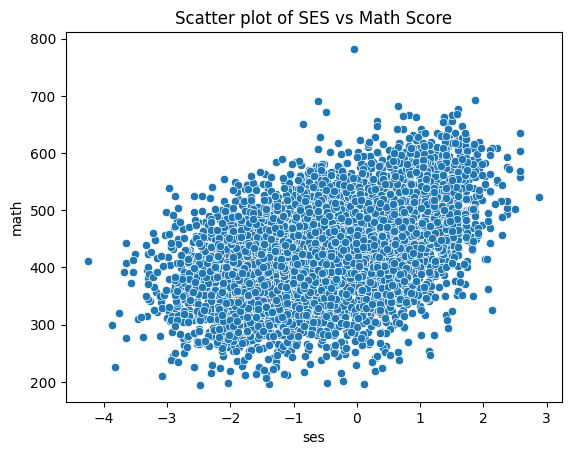

In [ ]:
sns.scatterplot(x='ses', y='math', data=pisa2009_chl)
plt.title('Scatter plot of SES vs Math Score')
plt.show()

#### C√°lculo de la Correlaci√≥n de Spearman

A continuaci√≥n, calculamos el coeficiente de correlaci√≥n de Spearman para evaluar la fuerza y direcci√≥n de la relaci√≥n entre estatus socioecon√≥mico y el puntaje en matem√°ticas. Esta l√≠nea de c√≥digo calcula el coeficiente de correlaci√≥n de Spearman (rho) junto con su valor de *p*, que indica si la correlaci√≥n es estad√≠sticamente significativa.

In [ ]:
# Eliminar filas con valores nulos en 'ses' o 'math'
df_clean = df[['ses', 'math']].dropna()

# Realizar nuevamente la correlaci√≥n de Spearman
correlation, p_value = stats.spearmanr(df_clean['ses'], df_clean['math'])

# Mostrar los resultados
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation: 0.4455669934512785
P-value: 2.094764225285374e-270


-   **Interpretaci√≥n de los Resultados**: Finalmente, interpretamos el coeficiente de correlaci√≥n y el valor de *p* para determinar si existe una asociaci√≥n significativa entre las variables. Si el valor de p es lo suficientemente peque√±o (*p* \< .05), se rechaza la hip√≥tesis nula. Esto indica que existe una asociaci√≥n significativa entre el estatus socio-econ√≥mico y los puntajes en matem√°ticas.
-   **Reporte de resultados**: Existe una asociaci√≥n significativa y positiva entre el estatus socioecon√≥mico de los estudiantes y su puntaje en matem√°ticas (*œÅ* = .45, *p* \< .001), siendo una fuerza de asociaci√≥n moderada.
-   En este caso, si el coeficiente de Spearman es positivo y significativo, podemos concluir que a medida que aumenta el estatus socioecon√≥mico de los estudiantes, tambi√©n tienden a aumentar sus puntajes en matem√°ticas, y esta asociaci√≥n es estad√≠sticamente significativa.
-   Tambi√©n, interpretamos la magnitud o fuerza de asociaci√≥n entre ambas variables evaluando el estad√≠stico seg√∫n los criterios de \@cohen2013.
    -   **Correlaci√≥n peque√±a (baja)**: r ‚âà 0.10 a r = 0.29.
    -   **Correlaci√≥n moderada (media)**: r ‚âà 0.30 a r = 0.49.
    -   **Correlaci√≥n alta**: r ‚âà 0.50 a r = 1.00.
-   Estos valores proporcionan una orientaci√≥n general para interpretar la magnitud de la relaci√≥n entre dos variables. Es importante tener en cuenta que estos criterios son convenciones y deben interpretarse en el contexto espec√≠fico del campo de estudio.

### Prueba *t* de Diferencia de Medias para Muestras Independientes

La prueba *t* para muestras independientes se utiliza para comparar las medias de dos grupos independientes, en este caso, el puntaje en matem√°ticas entre ni√±os y ni√±as. Primero, obtenemos estad√≠sticas descriptivas b√°sicas del puntaje en matem√°ticas.

In [ ]:
print(pisa2009_chl['math'].describe())

count    5669.000000
mean      424.820547
std        80.518921
min       194.740000
25%       370.000000
50%       421.260000
75%       477.650000
max       782.060000
Name: math, dtype: float64


-   **Verificaci√≥n de Supuestos de Normalidad**: antes de realizar la prueba *t*, verificamos si la variable sigue una distribuci√≥n normal mediante varios m√©todos.

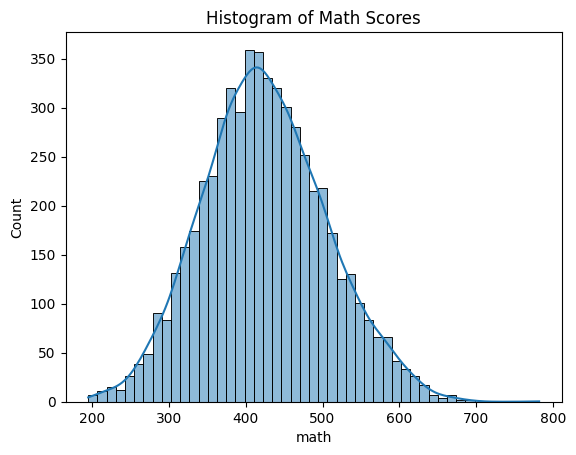

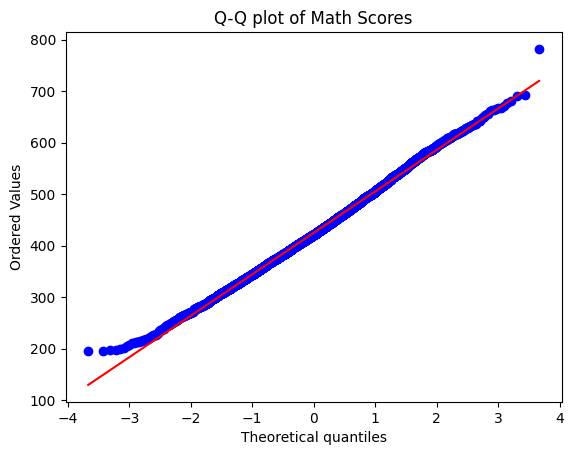

Shapiro-Wilk Test for Math: ShapiroResult(statistic=0.9967063273785082, pvalue=4.649112277175535e-09)


In [ ]:
# Verificaci√≥n de supuestos de normalidad
sns.histplot(pisa2009_chl['math'].dropna(), kde=True)
plt.title('Histogram of Math Scores')
plt.show()

# Q-Q plot
stats.probplot(pisa2009_chl['math'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot of Math Scores')
plt.show()

# Prueba de Shapiro-Wilk
shapiro_test_math = stats.shapiro(pisa2009_chl['math'].dropna()[:5000])
print(f'Shapiro-Wilk Test for Math: {shapiro_test_math}')

-   **Prueba *t* de Diferencia de Medias**: realizamos la prueba *t* para determinar si hay diferencias significativas en el puntaje en matem√°ticas entre ni√±os y ni√±as.

In [ ]:
t_stat, p_value = stats.ttest_ind(
    pisa2009_chl[pisa2009_chl['sex'] == 'Female']['math'].dropna(),
    pisa2009_chl[pisa2009_chl['sex'] == 'Male']['math'].dropna(),
    equal_var=True
)
print(f'T-test: t-statistic: {t_stat}, p-value: {p_value}')

T-test: t-statistic: -10.605105203263419, p-value: 4.9420560606247526e-26


-   Obtenemos el estad√≠stico de *d* de Cohen para estimar el tama√±o de efecto que refleja la magnitud de esta diferencia de medias expresado en unidades de desviaci√≥n est√°ndar.

### An√°lisis de Varianza (ANOVA)

El an√°lisis de varianza (ANOVA) es una t√©cnica estad√≠stica utilizada para comparar las medias de tres o m√°s grupos independientes para determinar si al menos una de las medias es significativamente diferente de las dem√°s. En esta secci√≥n, utilizaremos ANOVA para analizar si el puntaje promedio en matem√°ticas de los estudiantes difiere seg√∫n la dependencia del establecimiento al que asisten. Antes de realizar el ANOVA, es √∫til visualizar la variaci√≥n entre y dentro de los grupos utilizando un diagrama de caja (boxplot). Esto nos permite observar la dispersi√≥n de los puntajes en matem√°ticas para cada tipo de establecimiento.

La siguiente l√≠nea de c√≥digo genera un gr√°fico que muestra la distribuci√≥n de los puntajes en matem√°ticas para cada tipo de establecimiento (type). Si las cajas se superponen significativamente, podr√≠a no haber diferencias claras entre los grupos.

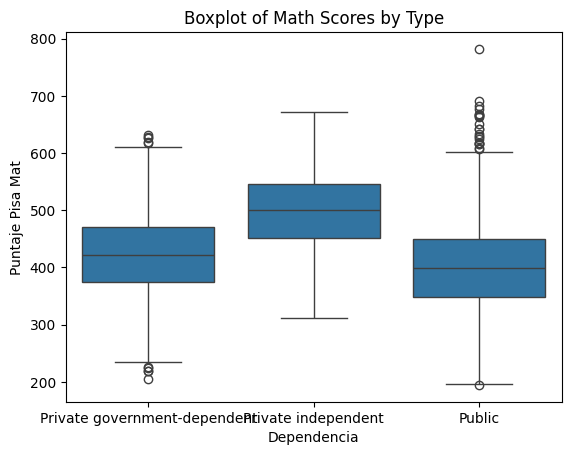

In [ ]:
sns.boxplot(x='type', y='math', data=pisa2009_chl)
plt.xlabel('Dependencia')
plt.ylabel('Puntaje Pisa Mat')
plt.title('Boxplot of Math Scores by Type')
plt.show()

In [ ]:
La pregunta de investigaci√≥n que abordaremos con el ANOVA es la siguiente: dDifiere significativamente el puntaje promedio en matem√°ticas de los estudiantes seg√∫n la dependencia del establecimiento al que asisten? Y formulamos las hip√≥tesis nula y alternativa:

-   **H0**: No hay diferencias significativas en los puntajes promedios de matem√°ticas entre estudiantes en establecimientos de distintas dependencias.
-   **H1**: No todos los promedios son iguales.

Estimamos un modelo ANOVA utilizando la funci√≥n `sm.formula.ols()` y `sm.stats.anova_lm()` para determinar si existen diferencias significativas en los puntajes promedios de matem√°ticas entre los diferentes tipos de establecimientos.

In [ ]:
model = sm.formula.ols('math ~ C(type)', data=pisa2009_chl).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F        PR(>F)
C(type)   1.687881e+06     2.0  155.566858  4.807682e-66
Residual  2.429287e+07  4478.0         NaN           NaN


-   La funci√≥n `sm.stats.anova_lm()` calcula el estad√≠stico *F*, que compara la variabilidad entre las medias de los grupos con la variabilidad dentro de los grupos. El resumen `print(anova_table)` proporcionar√° el valor del estad√≠stico *F* y su significancia.
-   **Interpretaci√≥n de los Resultados**: Interpretamos el valor del estad√≠stico *F* y el valor p para determinar si podemos rechazar la hip√≥tesis nula. Si el valor de p es lo suficientemente peque√±o (*p* \< .05), se rechaza la hip√≥tesis nula. Esto indica que existen diferencias significativas en los puntajes promedio de matem√°ticas entre los diferentes tipos de establecimientos.
-   **Reporte de Resultados**: El puntaje promedio de los estudiantes en matem√°ticas difiere seg√∫n la dependencia del establecimiento al que asisten (*F*(1, 4479) = 243.2, *p* \< .001).
-   En este caso, si el valor *p* es menor que .05, podemos concluir que al menos uno de los grupos tiene un puntaje promedio en matem√°ticas significativamente diferente de los otros, lo que sugiere que la dependencia del establecimiento est√° asociado a los puntajes de los estudiantes.

### Correlaci√≥n de Pearson (*r*)

La correlaci√≥n de Pearson (*r*) es una medida que eval√∫a la fuerza y la direcci√≥n de la asociaci√≥n lineal entre dos variables continuas. En esta secci√≥n, utilizaremos la correlaci√≥n de Pearson para investigar si existe una asociaci√≥n significativa entre los puntajes en matem√°ticas y los puntajes en lectura de los estudiantes. La pregunta de investigaci√≥n que abordaremos es la siguiente: ¬øexiste una asociaci√≥n significativa entre el puntaje en matem√°ticas y el puntaje en lectura de los estudiantes? Y formulamos las hip√≥tesis nula y alternativa:

-   **H0**: Los puntajes en lectura de los estudiantes no se asocian significativamente a los puntajes de matem√°ticas.
-   **H1**: Los puntajes en lectura de los estudiantes s√≠ se asocian significativamente a los puntajes de matem√°ticas.

Antes de calcular la correlaci√≥n de Pearson, es √∫til visualizar la relaci√≥n entre las dos variables para observar si existe una relaci√≥n de forma lineal.

<ipython-input-78-29d5a3c4a926>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


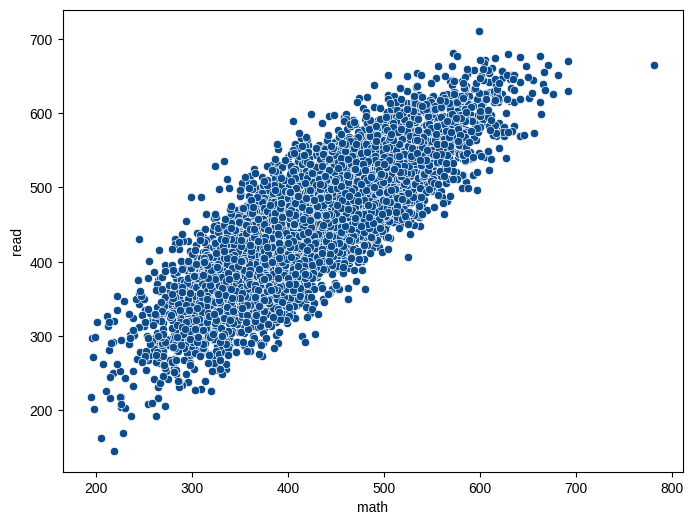

In [ ]:
# Crear el gr√°fico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pisa2009_chl, x='math', y='read', color='#0c4c8a')

# Aplicar un tema minimalista
plt.style.use('seaborn-whitegrid')

# Mostrar el gr√°fico
plt.show()

-   Estos gr√°ficos muestran la relaci√≥n entre los puntajes en matem√°ticas y lectura. Si los puntos se alinean en una tendencia lineal (ascendente o descendente), entonces sugiere una correlaci√≥n entre las dos variables.
-   Calculamos una correlaci√≥n de Pearson para cuantificar la fuerza y la direcci√≥n de la relaci√≥n entre los puntajes en matem√°ticas y en lectura.

In [ ]:
from scipy.stats import pearsonr

# Calcular la correlaci√≥n de Pearson
correlation, p_value = pearsonr(pisa2009_chl['math'], pisa2009_chl['read'])

# Mostrar los resultados
correlation, p_value

(0.8283717431233114, 0.0)

La funci√≥n `pearsonr()` devuelve el coeficiente de correlaci√≥n *r* junto con el valor *p*, que indica si la correlaci√≥n es estad√≠sticamente significativa.

-   **C√°lculo del Coeficiente de Determinaci√≥n** (*r¬≤*): es una medida que indica qu√© proporci√≥n de la variabilidad en una de las variables se puede explicar por la otra variable.

In [ ]:
r_squared = correlation ** 2
r_squared

0.6861997448051534

-   El *r¬≤* proporciona una interpretaci√≥n adicional de la correlaci√≥n, indicando la proporci√≥n de la variabilidad compartida entre las dos variables. Si lo multiplicas por 100, entonces puedes interpretarlo como un porcentaje.
-   **Interpretaci√≥n de los Resultados**: interpretamos el coeficiente de correlaci√≥n y el valor *p* para determinar si existe una asociaci√≥n significativa entre las variables. Si el valor *p* es lo suficientemente peque√±o (*p* \< .05), se rechaza la hip√≥tesis nula. Esto indica que existe una asociaci√≥n significativa entre los puntajes en matem√°ticas y lectura.
-   **Reporte de Resultados**: Existe una asociaci√≥n significativa, positiva y alta entre los puntajes de lectura y los puntajes en matem√°ticas (*r* = .83, *p* \< .001). Los puntajes en matem√°ticas explican un 69% de los puntajes en lenguaje.
-   En este caso, si el valor *r* es positivo y significativo, podemos concluir que a medida que los puntajes en lectura aumentan, tambi√©n a aumentan los puntajes en matem√°ticas, y esta asociaci√≥n es estad√≠sticamente significativa.
-   *r¬≤* nos indica que aproximadamente el 69% de la variabilidad en los puntajes en lectura puede explicarse por los puntajes en matem√°ticas.

#### Generaci√≥n de una Tabla de Correlaci√≥n para M√∫ltiples Variables

Si deseas observar las correlaciones entre m√∫ltiples variables, puedes generar una tabla de correlaci√≥n. Esta l√≠nea de c√≥digo gener una tabla y muestra las correlaciones entre las variables seleccionadas, lo que puede ser √∫til para explorar relaciones adicionales en los datos.

In [ ]:
# Seleccionar las columnas 7 a 9 (indexadas desde 0, por lo que son las columnas 6 a 8 en Python)
subset = pisa2009_chl.iloc[:, 6:9]

# Calcular la matriz de correlaci√≥n
correlation_matrix = subset.corr()

# Redondear a dos decimales
correlation_matrix_rounded = correlation_matrix.round(2)

correlation_matrix_rounded

math  read  scie
math  1.00  0.83  0.86
read  0.83  1.00  0.84
scie  0.86  0.84  1.00